In [38]:
#IMPORTS AND COMMON VARIABLES
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import numpy as np
from math import sqrt

from constants import *
from maths import gaussian
from markov import MarkovModel
from markovlog import LogMarkovModel

fig_dpi = 200
fig_export = False

x = np.linspace(-4, 8, 300) # x values for figures
x_label = "Observation Space"
y_label = "Probability Density"

State Probability Functions (1)
===================

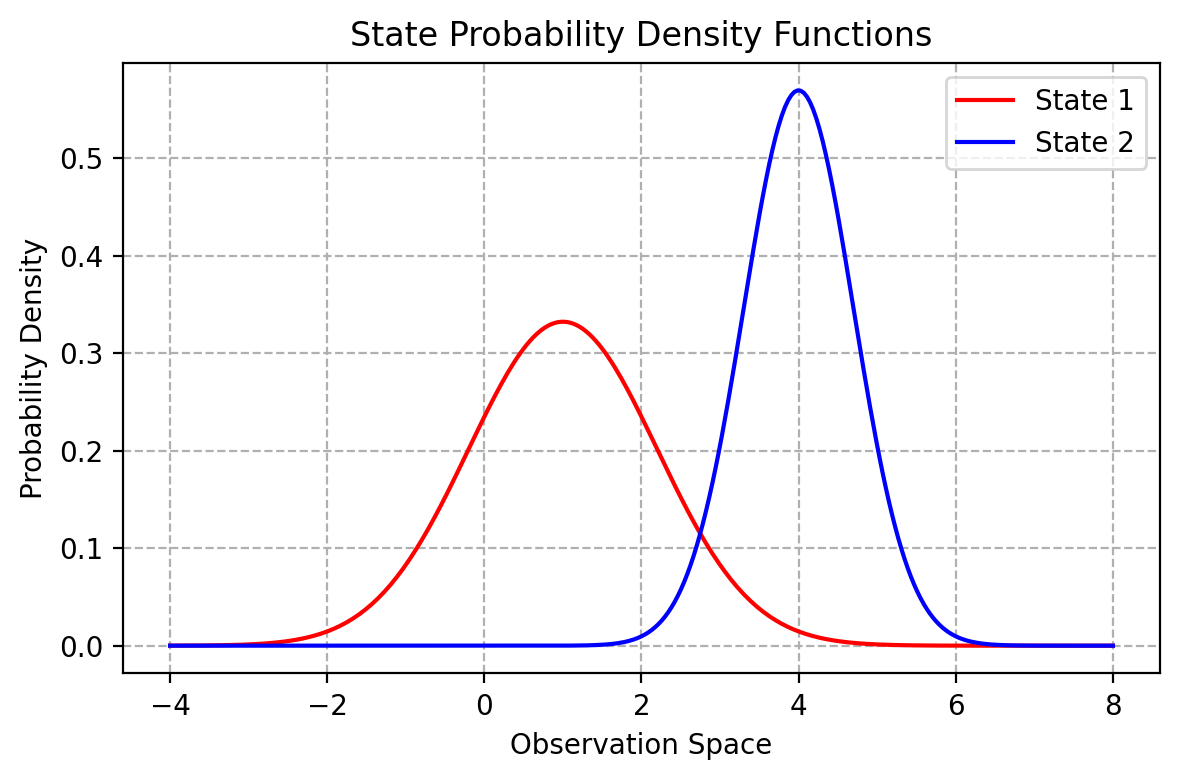

In [2]:
state_1_y = [gaussian(i, state1.mean, state1.std_dev) for i in x]
state_2_y = [gaussian(i, state2.mean, state2.std_dev) for i in x]

plt.plot(x, state_1_y, c='r', label="State 1")
plt.plot(x, state_2_y, c='b', label="State 2")

plt.legend()
plt.title("State Probability Density Functions")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/pdfs.png")
plt.show()

Output Probability Densities (2)
==========

In [3]:
for obs in observations:
    print(f'{obs} -> State 1: {gaussian(obs, state1.mean, state1.std_dev)},', 
                    'State 2: {gaussian(obs, state2.mean, state2.std_dev)}')

3.8 -> State 1: 0.02185157424475792, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
4.2 -> State 1: 0.009496655019831194, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
3.4 -> State 1: 0.04499247209432338, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
-0.4 -> State 1: 0.16833223796171576, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
1.9 -> State 1: 0.2509478601290037, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
3.0 -> State 1: 0.08289761566062391, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
1.6 -> State 1: 0.2933877723035829, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
1.9 -> State 1: 0.2509478601290037, State 2: {gaussian(obs, state2.mean, state2.std_dev)}
5.0 -> State 1: 0.0012852324969092556, State 2: {gaussian(obs, state2.mean, state2.std_dev)}


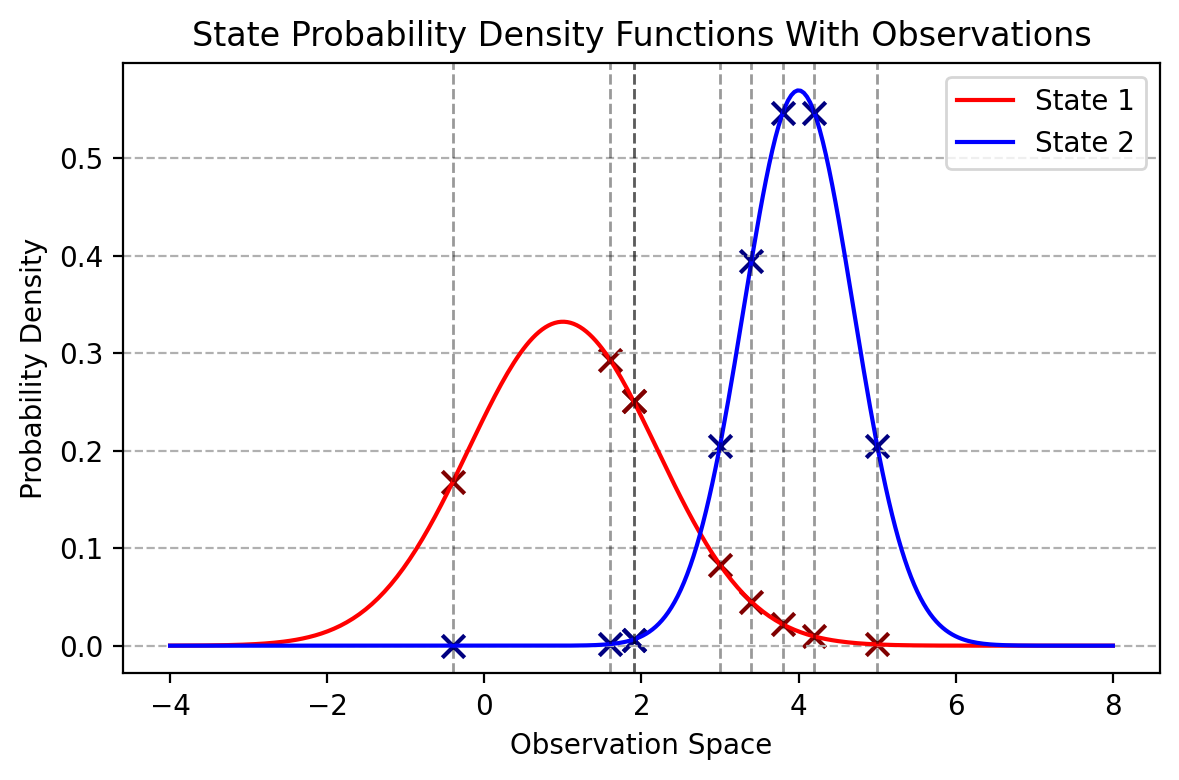

In [29]:
state_1_y = [gaussian(i, state1.mean, state1.std_dev) for i in x]
state_2_y = [gaussian(i, state2.mean, state2.std_dev) for i in x]

plt.plot(x, state_1_y, c='r', label="State 1")
plt.plot(x, state_2_y, c='b', label="State 2")

plt.legend()
plt.title("State Probability Density Functions With Observations")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(linestyle="--", axis='y')

state1_pd = [gaussian(i, state1.mean, state1.std_dev) for i in observations]
state2_pd = [gaussian(i, state2.mean, state2.std_dev) for i in observations]

#############################################
#             Observation Marks  
#############################################

config = {
    "s": 65,
    "marker": 'x'
}

[plt.axvline(x=i, ls='--', lw=1.0, c=(0,0,0), alpha=0.4) for i in observations]
plt.scatter(observations, state1_pd, color=(0.5, 0, 0), **config)
plt.scatter(observations, state2_pd, color=(0, 0, 0.5), **config)

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/pdfs-w-obs.png")
plt.show()

# Forward Procedure (3)

In [5]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition)
model.populate_forward()

print(model.forward)

forward = model.forward
model.calculate_p_obs_forward()


[[9.61469267e-03 2.00389806e-04 2.89433448e-04 4.30961030e-04
  9.94968491e-05 7.58875028e-06 2.06308972e-06 4.76335758e-07
  5.63267096e-10]
 [3.06389408e-01 1.56214298e-01 5.73475605e-02 8.00607227e-11
  1.63710810e-07 1.25762776e-06 2.59451223e-09 7.98988065e-10
  6.02373446e-09]]


1.9197737567283167e-10

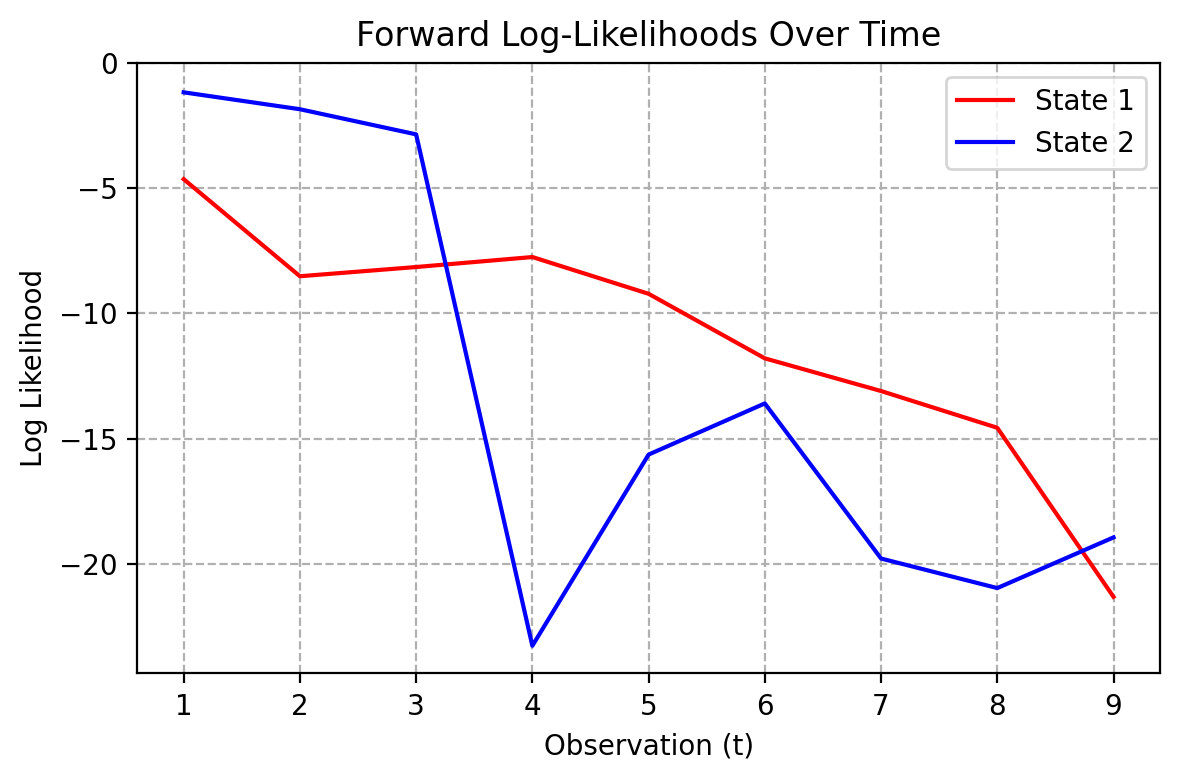

In [6]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

state_x = np.arange(1, 10)

from numpy import log as ln

plt.plot(state_x, [ln(i) for i in model.forward[0, :]], c='r', label="State 1")
plt.plot(state_x, [ln(i) for i in model.forward[1, :]], c='b', label="State 2")

plt.ylim(top=0)

plt.legend()
plt.title("Forward Log-Likelihoods Over Time")

plt.xlabel("Observation (t)")
plt.ylabel("Log Likelihood")
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/forward-logline.png")
plt.show()

# Backward Procedure (4)

In [7]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition)
model.populate_backward()

print(model.backward)

backward = model.backward
model.calculate_p_obs_backward()


[[6.57892066e-11 2.92661737e-09 6.89869860e-08 4.45463420e-07
  1.92898428e-06 2.51074677e-05 9.30059204e-05 3.93414211e-04
  2.00000000e-02]
 [6.24515168e-10 1.22518178e-09 2.99943420e-09 2.11439342e-08
  3.02470605e-07 1.14745634e-06 3.77015860e-05 5.73240014e-03
  3.00000000e-02]]


1.9197737567283167e-10

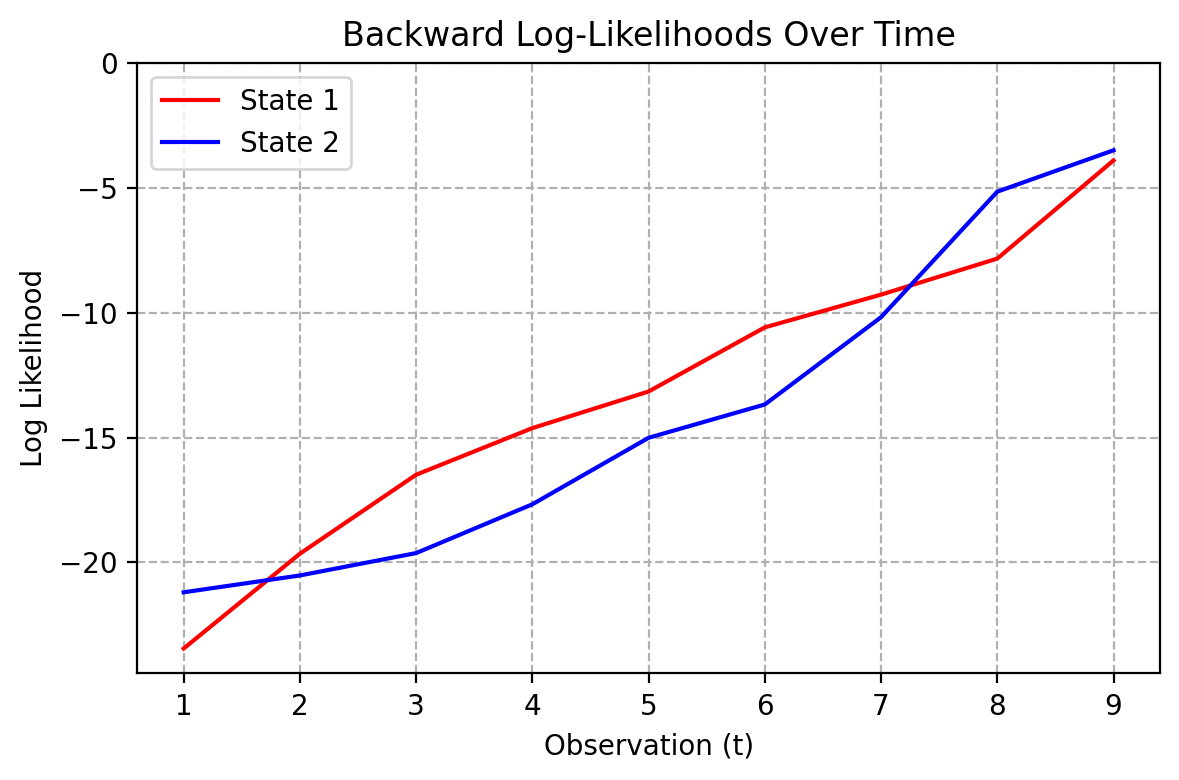

In [8]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

state_x = np.arange(1, 10)

from numpy import log as ln

plt.plot(state_x, [ln(i) for i in model.backward[0, :]], c='r', label="State 1")
plt.plot(state_x, [ln(i) for i in model.backward[1, :]], c='b', label="State 2")

plt.ylim(top=0)

plt.legend()
plt.title("Backward Log-Likelihoods Over Time")

plt.xlabel("Observation (t)")
plt.ylabel("Log Likelihood")
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/backward-logline.png")
plt.show()

# Compare Forward/Backward Final

In [9]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition)
model.populate_forward()
model.populate_backward()

print("forward:", model.calculate_p_obs_forward())
print("backward:", model.calculate_p_obs_backward())

print("diff: ", model.p_obs_forward - model.p_obs_backward)


forward: 1.9197737567283167e-10
backward: 1.9197737567283167e-10
diff:  0.0


# Occupation Likelihoods (5)

In [10]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

occupation = model.occupation
print(model.occupation)

[[3.29488306e-03 3.05486147e-03 1.04007783e-01 9.99999991e-01
  9.99742065e-01 9.92483109e-01 9.99490475e-01 9.76142401e-01
  5.86805704e-02]
 [9.96705117e-01 9.96945139e-01 8.95992217e-01 8.81769869e-09
  2.57935122e-04 7.51689067e-03 5.09524759e-04 2.38575993e-02
  9.41319430e-01]]


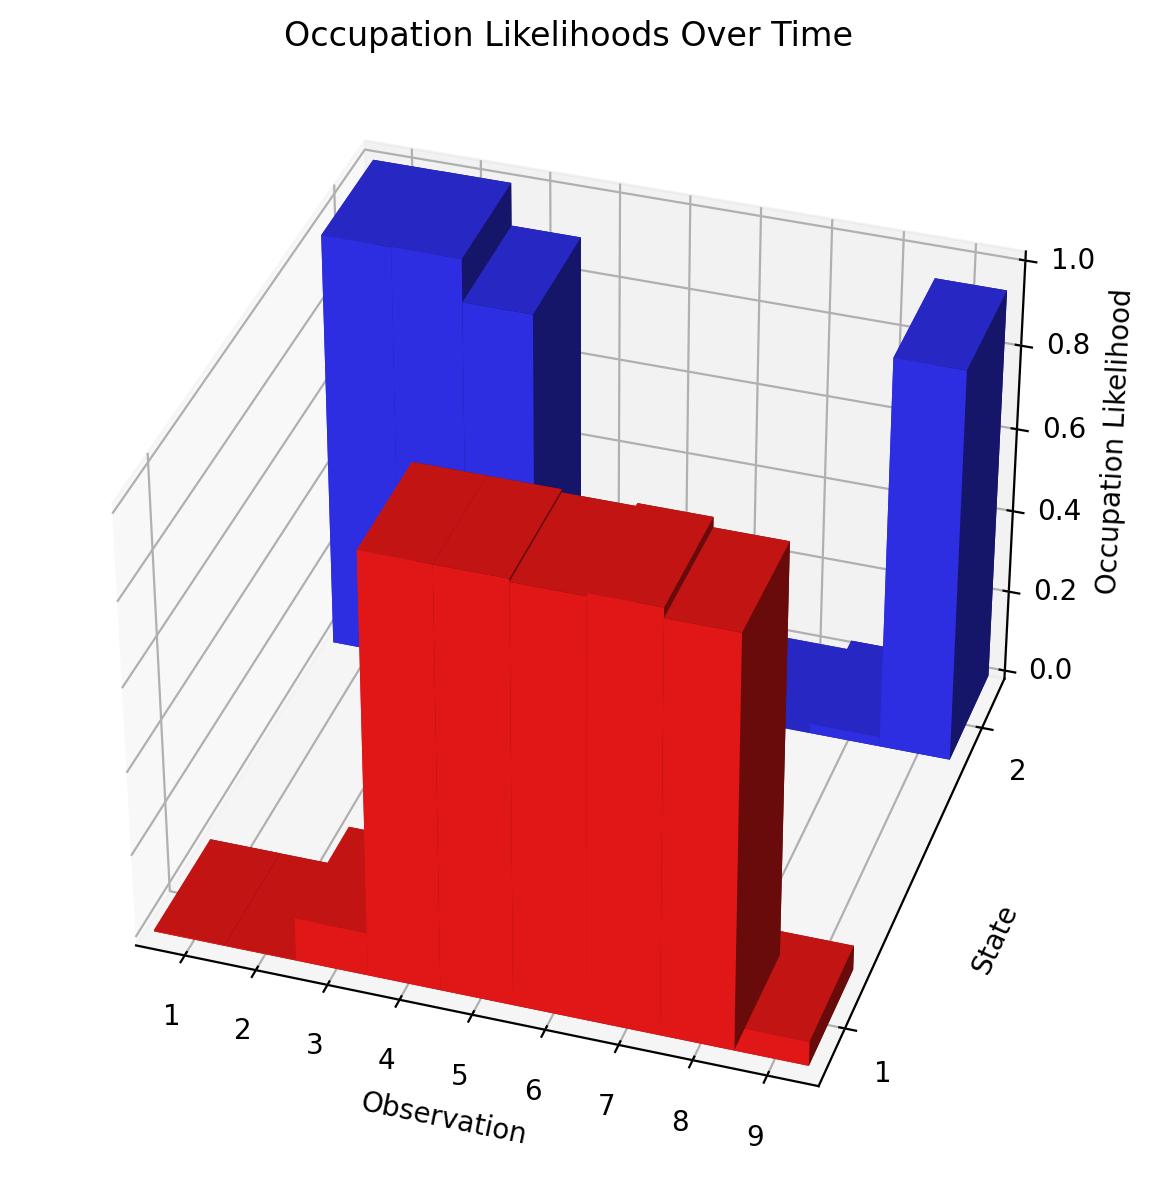

In [11]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

fig = plt.figure(figsize=(6,6), dpi=fig_dpi, tight_layout=True)
ax = fig.add_subplot(1, 1, 1, projection="3d", xmargin=0, ymargin=0)

y_width = 0.3

X = np.arange(1, 10) - 0.5
Y = np.arange(1, 3) - 0.5*y_width
X, Y = np.meshgrid(X, Y)
Z = np.zeros(model.forward.size)

dx = np.ones(model.forward.size)
dy = y_width * np.ones(model.forward.size)

colours = [*[(1.0, 0.1, 0.1) for i in range(9)], *[(0.2, 0.2, 1.0) for i in range(9)]]
ax.bar3d(X.flatten(), Y.flatten(), Z, 
         dx, dy, model.occupation.flatten(), 
         color=colours, shade=True)

ax.set_yticks([1, 2])
ax.set_zlim(top=1.0)

ax.set_title("Occupation Likelihoods Over Time")
ax.set_xlabel("Observation")
ax.set_ylabel("State")
ax.set_zlabel("Occupation Likelihood")
ax.view_init(35, -72)
if fig_export:
    savefig("report/res/occupation-bars.png")
fig.show()

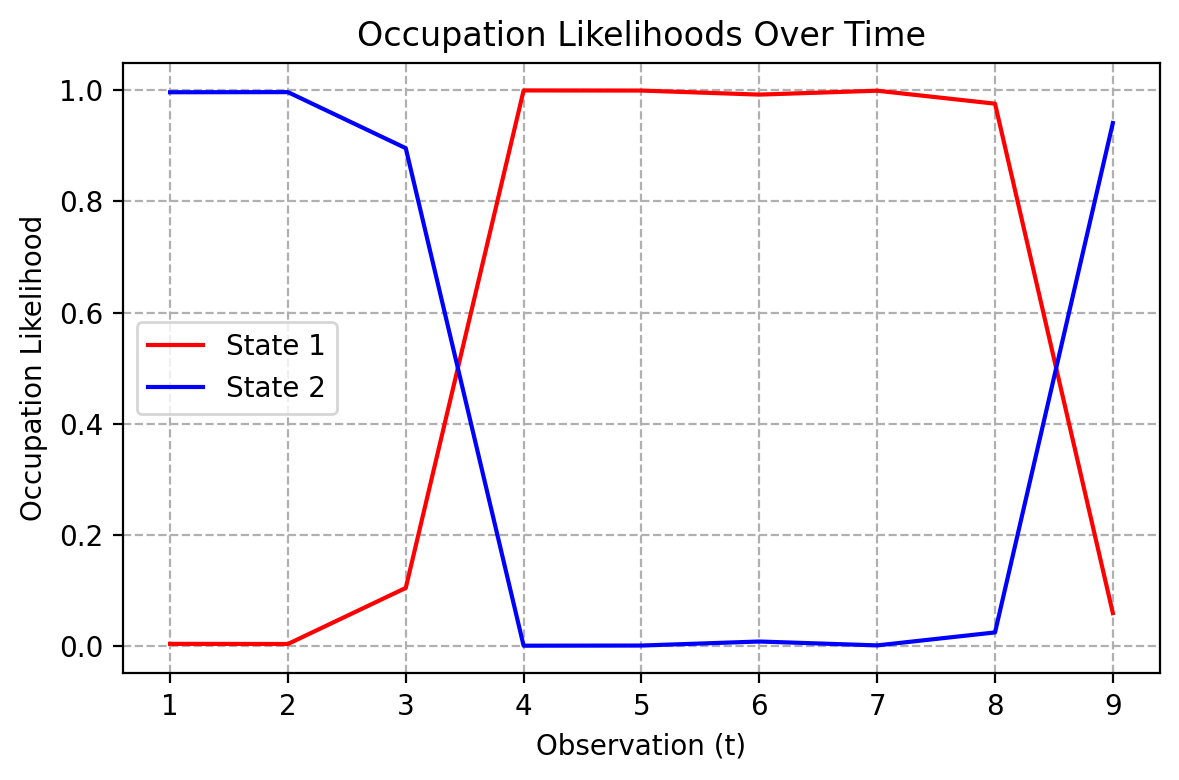

In [12]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

state_x = np.arange(1, 10)

plt.plot(state_x, model.occupation[0, :], c='r', label="State 1")
plt.plot(state_x, model.occupation[1, :], c='b', label="State 2")

plt.legend()
plt.title("Occupation Likelihoods Over Time")

plt.xlabel("Observation (t)")
plt.ylabel("Occupation Likelihood")
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/occupation-line.png")
plt.show()

# Re-estimate Mean & Variance (6)

In [13]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

print("mean: ", [state1.mean, state2.mean])
print("variance: ", [state1.variance, state2.variance])
print()

print("mean: ", model.reestimated_mean())
print("variance: ", model.reestimated_variance())


mean:  [1, 4]
variance:  [1.44, 0.49]

mean:  [1.6747846620246418, 4.089148442531048]
variance:  [1.8465047320872243, 0.37804421554121403]


New PDFs (7)
===================

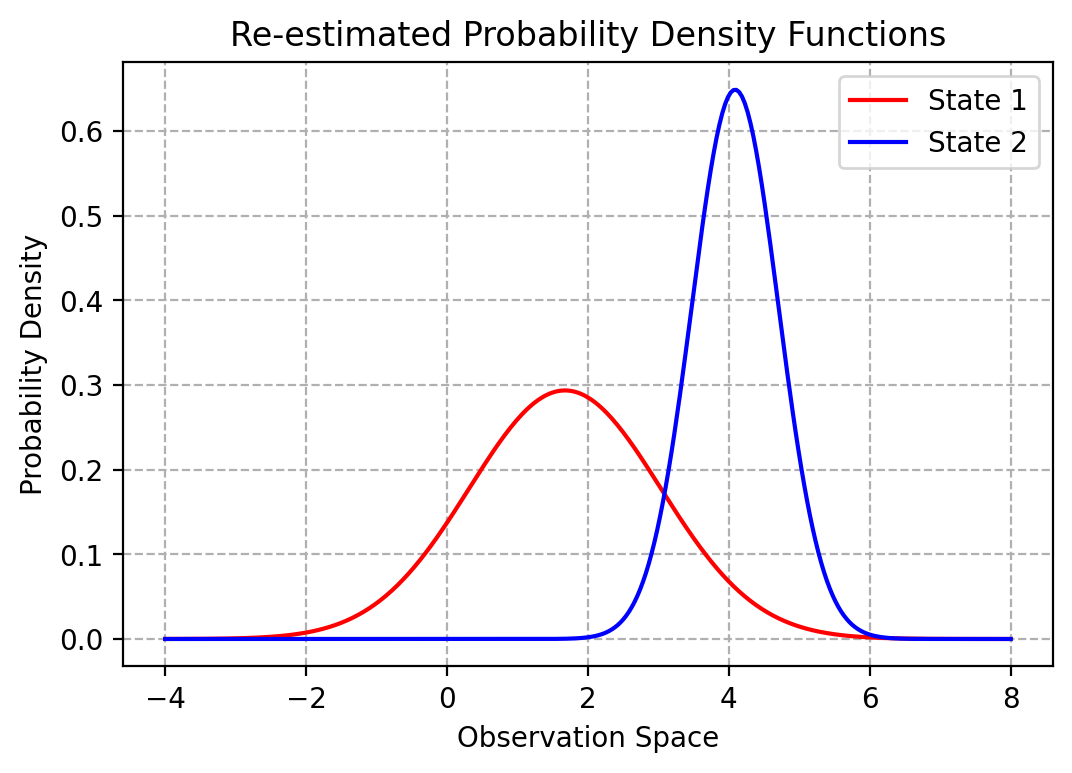

In [14]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

new_mean = model.reestimated_mean()
new_var = model.reestimated_variance()
new_std_dev = [sqrt(x) for x in new_var]

state_1_y = [gaussian(i, new_mean[0], new_std_dev[0]) for i in x]
state_2_y = [gaussian(i, new_mean[1], new_std_dev[1]) for i in x]

plt.plot(x, state_1_y, c='r', label="State 1")
plt.plot(x, state_2_y, c='b', label="State 2")

plt.legend()
plt.title("Re-estimated Probability Density Functions")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
plt.show()

# Compare PDFs (7)

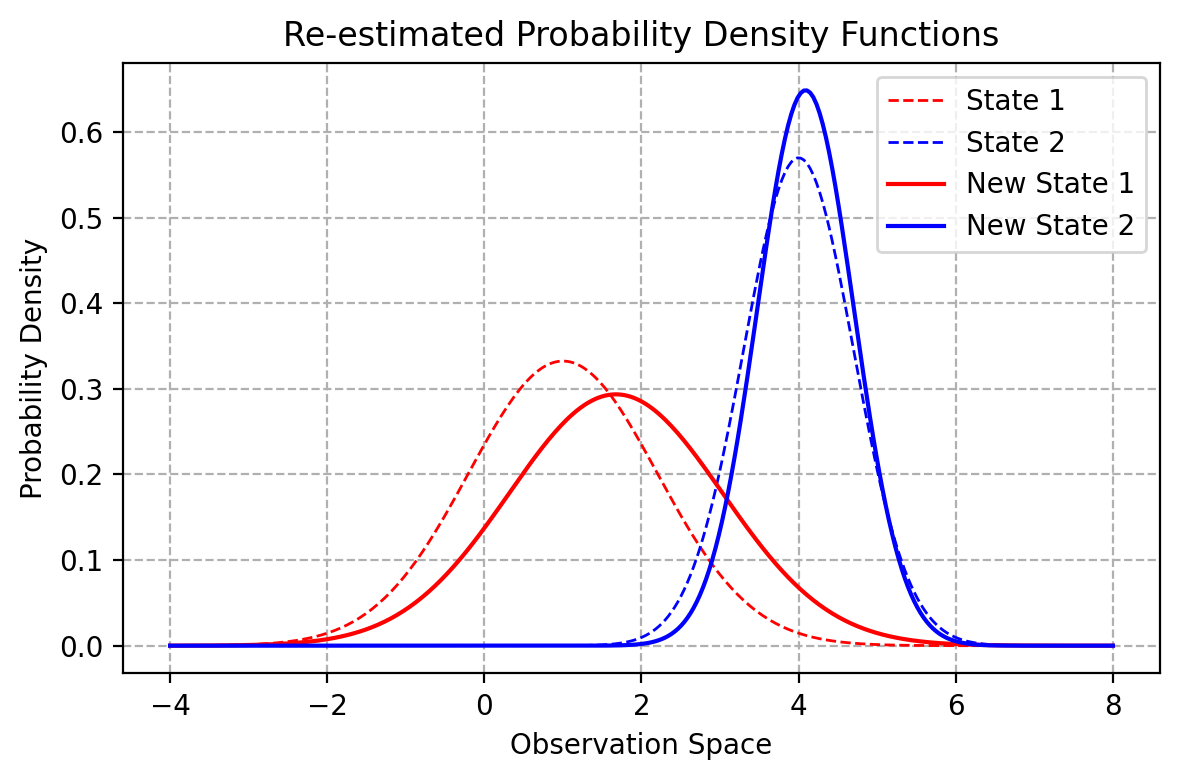

In [15]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

new_mean = model.reestimated_mean()
new_var = model.reestimated_variance()
new_std_dev = [sqrt(x) for x in new_var]

#######################################
#              Original
#######################################
state_1_y = [gaussian(i, state1.mean, state1.std_dev) for i in x]
state_2_y = [gaussian(i, state2.mean, state2.std_dev) for i in x]
plt.plot(x, state_1_y, '--', c='r', label="State 1", linewidth=1.0)
plt.plot(x, state_2_y, '--', c='b', label="State 2", linewidth=1.0)

#######################################
#            Re-Estimated
#######################################
state_1_new_y = [gaussian(i, new_mean[0], new_std_dev[0]) for i in x]
state_2_new_y = [gaussian(i, new_mean[1], new_std_dev[1]) for i in x]
plt.plot(x, state_1_new_y, c='r', label="New State 1")
plt.plot(x, state_2_new_y, c='b', label="New State 2")

plt.legend()
plt.title("Re-estimated Probability Density Functions")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(linestyle="--")

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export:
    savefig("report/res/re-est-pdfs.png")
plt.show()

# Multiple Iterations

mean (0):  [1.6747846620246418, 4.089148442531048]
var (0):  [1.8465047320872243, 0.37804421554121403]

mean (1):  [1.9929120009112011, 4.056666511439969]
var (1):  [2.1156649116379684, 0.2918412170796056]

mean (2):  [2.1821733376587726, 3.9904324818569052]
var (2):  [2.3495798563848562, 0.23463095910597057]

mean (3):  [2.2693898497202887, 3.9240609125392]
var (3):  [2.461617864622651, 0.17784017241318095]

mean (4):  [2.301476335144215, 3.8740199830675355]
var (4):  [2.53136226603993, 0.13079227312275157]



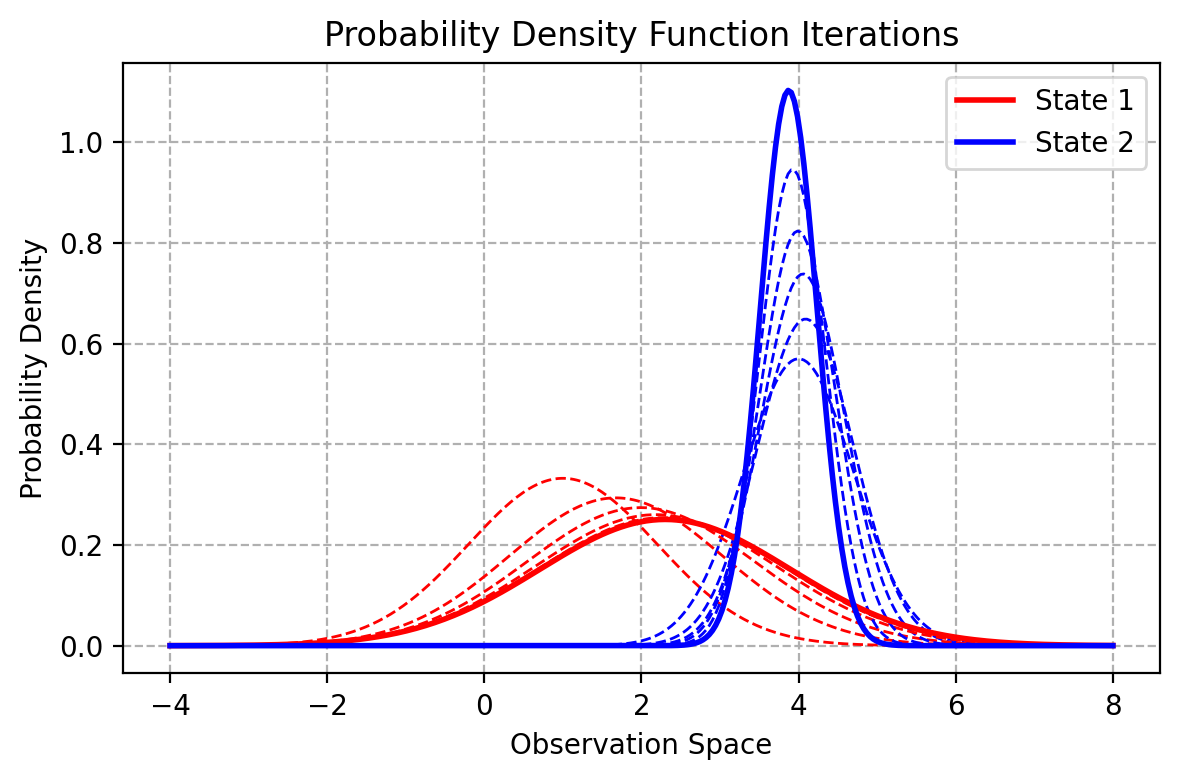

In [39]:
iterations = 5

mean = [state1.mean, state2.mean]
var = [state1.variance, state2.variance]

plt.plot(x, [gaussian(i, mean[0], sqrt(var[0])) for i in x], '--', c='r', linewidth=1.0)
plt.plot(x, [gaussian(i, mean[1], sqrt(var[1])) for i in x], '--', c='b', linewidth=1.0)

label1=None
label2=None

for i in range(iterations):
    model = MarkovModel(states=[State(mean[0], var[0], state1.entry, state1.exit), 
                                State(mean[1], var[1], state2.entry, state2.exit)], 
                        observations=observations, 
                        state_transitions=state_transition)
    model.populate()

    mean = model.reestimated_mean()
    var = model.reestimated_variance()

    print(f"mean ({i}): ", mean)
    print(f"var ({i}): ", var)
    print()

    state_1_y = [gaussian(i, mean[0], sqrt(var[0])) for i in x]
    state_2_y = [gaussian(i, mean[1], sqrt(var[1])) for i in x]

    style = '--'
    linewidth = 1.0
    if i == iterations - 1:
        style = '-'
        linewidth = 2.0
        label1='State 1'
        label2='State 2'

    plt.plot(x, state_1_y, style, c='r', label=label1, linewidth=linewidth)
    plt.plot(x, state_2_y, style, c='b', label=label2, linewidth=linewidth)

plt.title("Probability Density Function Iterations")

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(linestyle="--")
plt.legend()

fig = matplotlib.pyplot.gcf()
fig.set_dpi(fig_dpi)
fig.set_tight_layout(True)
if fig_export or True:
    savefig("report/res/iterated-pdfs.png")
plt.show()


# Baum-Welch State Transition Re-estimations

In [17]:
model = MarkovModel(states=[state1, state2], 
                    observations=observations, 
                    state_transitions=state_transition).populate()

print(a_matrix)
model.reestimated_state_transitions()

[[0.92 0.06]
 [0.04 0.93]]


array([[0.8035064 , 0.18507025],
       [0.26043109, 0.49589971]])